# PCA - BERT

### Read df
- idx: Indice associato da BERT ad una specifica word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA.pkl".format(TARGET_DATASET))
df.head()

,principal component 1,principal component 2,idx
0,-2.842154,10.121257,101.0
1,-2.957240,0.628578,10166.0
2,3.471320,-12.946467,16099.0
3,22.413568,12.074741,8202.0
4,21.284266,11.028157,3240.0


### Drop idx column

In [2]:
plot_df = df.drop(columns=["idx"])
plot_df.head()

,principal component 1,principal component 2
0,-2.842154,10.121257
1,-2.957240,0.628578
2,3.471320,-12.946467
3,22.413568,12.074741
4,21.284266,11.028157


### Plot principal components

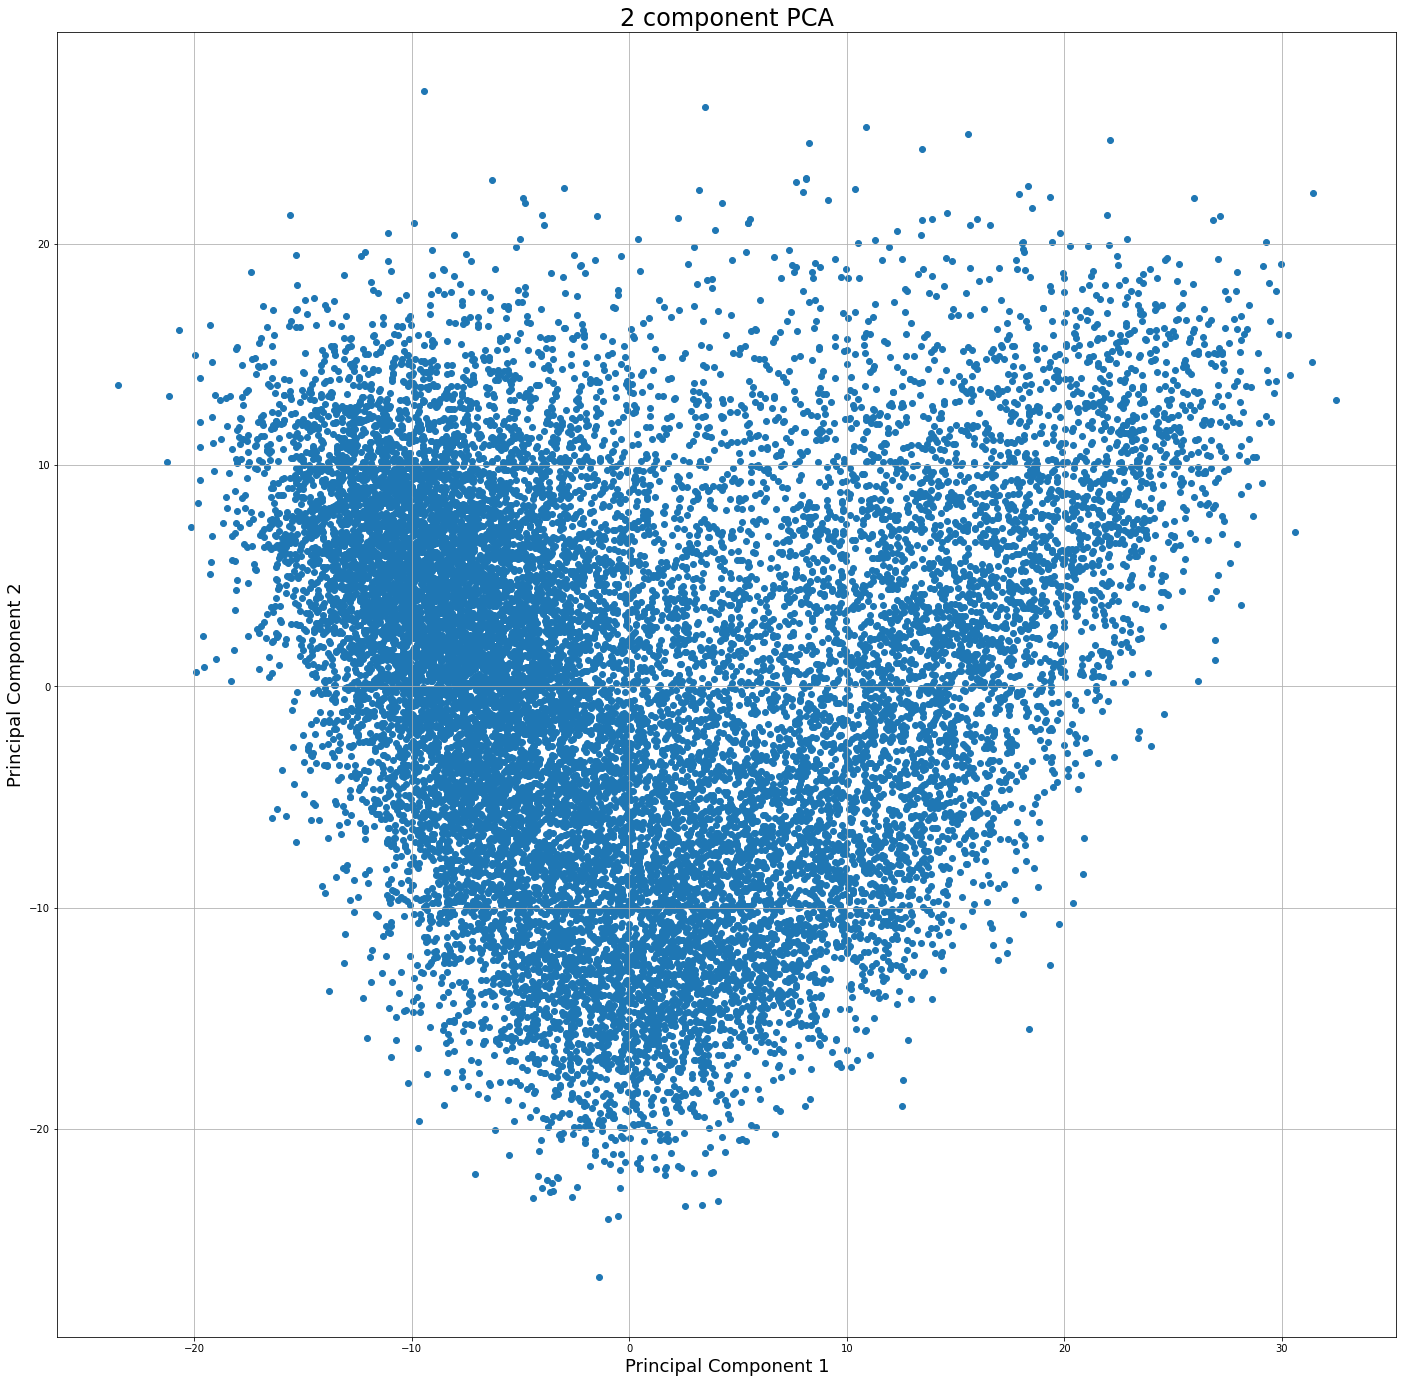

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (24, 24))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(plot_df["principal component 1"], plot_df["principal component 2"])
ax.grid()